# Data Meets Python 🐍 #2   
--- 
## How you can create Actionable Insights with a Decile Segmentation Analysis

📝 **Author:** José Oliveira da Cruz   
🔗 **[Medium Article](https://medium.com/p/b1c253b514b3)**
<p>
  <a href="https://www.linkedin.com/in/josecruz-phd/" rel="nofollow noreferrer">
    <img src="https://i.stack.imgur.com/gVE0j.png" alt="linkedin"> LinkedIn
  </a> &nbsp; 
    <br>
  <a href="https://github.com/joseferncruz" rel="nofollow noreferrer">
    <img src="https://i.stack.imgur.com/tskMh.png" alt="github"> Github
  </a>
</p>




## 1. Gather customer data.

In [10]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

def get_data(url: str) -> pd.DataFrame:
    """Download and load dataframe with UCI Online Retail Transactional Data. 

    See Also
    --------
    UCI: https://archive.ics.uci.edu/dataset/352/online+retail
    """

    response = requests.get(url)
    
    response.raise_for_status()

    dataframe = pd.read_excel(url)

    return dataframe

dataframe = get_data(URL)

dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2. Make sure our data is clean and has the appropriate aggregations.

In [5]:
def clean_data(dataframe: "pd.Dataframe") -> pd.DataFrame:
    
    # Remove data without/NULL CustomerID information
    temp_dataframe = dataframe[~dataframe.CustomerID.isna()].copy()
    
    # Fix datatype for CustomerID
    temp_dataframe = (
        temp_dataframe
        .assign(
            CustomerID=lambda df: df.CustomerID.astype(int).astype('string')
        )
    )
    
    # Aggregate at Customer Level
    temp_customer_level = (
        temp_dataframe
        .groupby(['CustomerID'])
        .UnitPrice
        .sum()
        .rename('total_value')
        .reset_index()
    )
    
    return temp_customer_level

customer_level = clean_data(dataframe)

customer_level.head()

,CustomerID,total_value
0,12346,2.08
1,12347,481.21
2,12348,178.71
3,12349,605.10
4,12350,65.30


## 3. Use the qcut pandas function to create the decile labels.

In [6]:
def create_decile_labelled_dataframe(customer_level_dataframe):
    

    # Which column to use
    value_column_to_cut = customer_level_dataframe.total_value
    
    
    # For a decile analysis, this means an array of 10 quantiles
    quantiles = np.linspace(0, 1, num=11, endpoint=True)
    
    # Labels for each group
    labels = [f'group_{i}' for i in range(1, 11)]
    
    customer_level_dataframe['label'] = pd.qcut(
        
        x=value_column_to_cut, 
        q=quantiles, 
        labels=labels
            
    )
    
    return customer_level_dataframe

## 4. Extract insights from your decile groups.

In [8]:
def plot_figure_with_stats(customer_level_dataframe):
    """Plot the decile analysis."""
    
    # Group data
    grouped = customer_level_dataframe.groupby(['label'])
    
    # Calculate the total value
    total_value = grouped.total_value.sum().astype(int).values.sum()
    
    # Calculate the % of total value for each group
    perct_each_group = grouped.total_value.sum().div(total_value).mul(100).round(1).values
    
    n_customer_group = grouped.CustomerID.nunique().median()
    
    fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

    ax = grouped.total_value.sum().plot.barh(ax, color=['C0']*8 + ['C1']*2)
    
    # Create annotations for the bars
    for i, v in enumerate(customer_level_dataframe.groupby(['label']).total_value.sum().astype(int).values):
        ax.text(v*1.015, i, f'{v} EUR | {perct_each_group[i]}% of total revenue', color='black', va='center')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set(ylabel='', xticklabels=[], xticks=[])
    fig.suptitle('~70% of our revenue comes from 20% of our customers')

    ax.tick_params(axis='y', which='both', length=0)
    
    # Add the legend
    leg_handle = plt.Line2D([], [], color='none', marker='', linestyle='-')
    plt.legend(handles=[leg_handle], labels=[f'Number of customers per group: ~{n_customer_group:.0f}'], loc=(1, 0))
    
    plt.show()

## 5.  All in one!

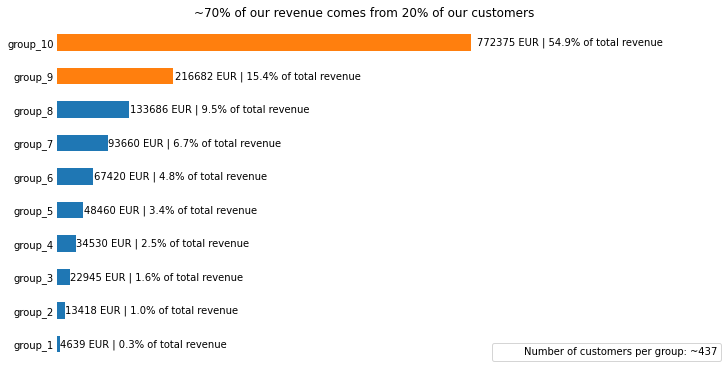

In [11]:
# Now all in one:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
dataframe = get_data(URL) # see previous code snippet
customer_level_dataframe = create_decile_labelled_dataframe(clean_data(dataframe))
plot_figure_with_stats(customer_level_dataframe)

### Thank you for following my work!

---
For more content like this, please follow me on LinkedIn 👉 [José Oliveira da Cruz, PhD](https://www.linkedin.com/in/josecruz-phd/).


❗️**Found a typo?** Sorry for the inconvenience. I've tried to catch them all, but 'to err is human.' 

Please let me know by [creating a GitHub issue](https://github.com/joseferncruz/data-meets-python/issues/new), and I will fix it as soon as possible. Thank you!
